In [32]:
import pandas as pd
import os

import numpy as np
import pandas as pd
import re
%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


from udacity_inflation_forecast.models.train_classifier import load_data, clean_data, train_test_split


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def save_fig(fig, name=None):
    report_folder = '../../../report/'
    if name is None:
        name = fig._suptitle.lower().replace(' ', '_')
    fig.savefig(os.path.join(report_folder, name+'.pdf'))

In [4]:
database_filepath = '../data/cpi_database.db'

In [5]:
data_cpi, data_indentation, data_cpi_w, data_add_vars = load_data(database_filepath)

In [6]:
def format_indentation(x):
    ''' Adds padding spaces dependend on the identation level
    
    '''
    i = data_indentation.loc[x]*4
    return '\hspace*{'+str(i)+'ex}'+x

In [7]:
def clean_tex(x):
    to_repl = {r'\textbackslash ': '\\',
               r'\{': '{',
               r'\}': '}',
               '%': '\%',
               'nan\%': 'NA',
              }
    for k, v in to_repl.items():
        x = x.replace(k, v)
    return x

In [8]:
def to_tex(df):
    print(clean_tex(df.to_latex()))

# Summary statistics

In [9]:
data_cpi = pd.DataFrame(data_cpi)

In [10]:
data_cpi

,All items,Food and beverages,Food,Food at home,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Nonalcoholic beverages and beverage materials,Coffee,...,"Tuition, other school fees, and childcare",Communication,Information and information processing,"Information technology, hardware and services",Personal computers and peripheral equipment,Other goods and services,Tobacco and smoking products,Personal care,Miscellaneous personal services,Laundry and dry cleaning services
date,,,,,,,,,,,,,,,,,,,,,
1947-01-31,21.480,NaN,22.800,NaN,NaN,NaN,NaN,20.800,11.100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-28,21.620,NaN,23.100,NaN,NaN,NaN,NaN,21.100,11.400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-31,22.000,NaN,23.800,NaN,NaN,NaN,NaN,22.200,11.700,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-30,22.000,NaN,23.500,NaN,NaN,NaN,NaN,21.800,12.000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-05-31,21.950,NaN,23.400,NaN,NaN,NaN,NaN,22.200,12.100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,303.294,319.316,321.729,301.774,354.081,315.012,267.917,348.332,216.811,236.541,...,834.279,75.413,71.022,7.120,37.289,536.518,1423.094,273.439,532.363,217.996
2023-06-30,303.841,319.638,322.071,301.626,354.305,313.684,267.107,350.946,216.673,235.012,...,835.686,75.067,70.685,7.135,37.357,537.386,1424.290,273.929,533.084,217.129
2023-07-31,304.348,320.376,322.837,302.452,354.368,315.201,268.343,352.480,216.724,237.469,...,838.578,74.973,70.609,7.112,36.820,537.926,1431.302,273.964,530.282,217.470


In [11]:
assert(set(data_cpi_w.index).issubset(set(data_cpi.columns)))

In [12]:
data_cpi = data_cpi.loc[:, data_cpi_w.index]
summary = data_cpi.apply(lambda x: x.dropna().index[0])

In [13]:
summary = summary.to_frame('first date')

In [14]:
descriptive = data_cpi.pct_change().describe().T.iloc[:, 1:]

In [15]:
summary = summary.merge(descriptive[['mean', 'std', 'min', 'max']], how='left', left_index=True, right_index=True)

In [16]:
format_dict = {k: '{:.2%}' for k in descriptive.columns}
format_dict['first date'] = lambda x: x.strftime('%Y-%m-%d')


to_tex((summary.rename(format_indentation)).style.format(format_dict))

\begin{tabular}{llrrrr}
{} & {first date} & {mean} & {std} & {min} & {max} \\
{FRED Name} & {} & {} & {} & {} & {} \\
\hspace*{0ex}All items & 1947-01-31 & 0.29\% & 0.34\% & -1.77\% & 1.96\% \\
\hspace*{4ex}Food and beverages & 1967-01-31 & 0.33\% & 0.41\% & -0.96\% & 5.17\% \\
\hspace*{8ex}Food & 1947-01-31 & 0.29\% & 0.56\% & -2.32\% & 5.87\% \\
\hspace*{4ex}Housing & 1967-01-31 & 0.35\% & 0.31\% & -0.81\% & 1.86\% \\
\hspace*{8ex}Shelter & 1953-01-31 & 0.34\% & 0.35\% & -1.43\% & 2.24\% \\
\hspace*{8ex}Fuels and utilities & 1953-01-31 & 0.31\% & 0.73\% & -2.40\% & 5.61\% \\
\hspace*{8ex}Household furnishings and operations & 1967-01-31 & 0.19\% & 0.33\% & -0.64\% & 2.02\% \\
\hspace*{4ex}Apparel & 1947-01-31 & 0.13\% & 0.47\% & -3.66\% & 1.87\% \\
\hspace*{8ex}Mens and boys apparel & 1947-01-31 & 0.13\% & 0.58\% & -4.42\% & 2.61\% \\
\hspace*{8ex}Womens and girls apparel & 1947-01-31 & 0.08\% & 0.75\% & -4.09\% & 2.92\% \\
\hspace*{8ex}Footwear & 1947-01-31 & 0.19\% & 0.57\% & -2.58

In [17]:

format_dict = {k: '{:.2%}' for k in data_cpi_w.columns}


to_tex((data_cpi_w.rename(format_indentation).iloc[:, ::20]).style.format(format_dict))


\begin{tabular}{lrrrr}
{} & {1952} & {1972} & {1992} & {2012} \\
{FRED Name} & {} & {} & {} & {} \\
\hspace*{0ex}All items & 100.00\% & 100.00\% & 100.00\% & 100.00\% \\
\hspace*{4ex}Food and beverages & NA & NA & 17.40\% & 15.26\% \\
\hspace*{8ex}Food & 29.84\% & 22.49\% & 15.78\% & 14.31\% \\
\hspace*{4ex}Housing & 32.18\% & 33.86\% & 41.40\% & 41.02\% \\
\hspace*{8ex}Shelter & 17.46\% & 21.83\% & 27.88\% & 31.68\% \\
\hspace*{8ex}Fuels and utilities & NA & 4.71\% & 7.28\% & 5.30\% \\
\hspace*{8ex}Household furnishings and operations & 6.45\% & 7.32\% & 6.24\% & 4.04\% \\
\hspace*{4ex}Apparel & 9.42\% & 10.37\% & 6.00\% & 3.56\% \\
\hspace*{8ex}Mens and boys apparel & 3.00\% & 2.80\% & 1.42\% & 0.86\% \\
\hspace*{8ex}Womens and girls apparel & 4.16\% & 3.98\% & 2.46\% & 1.50\% \\
\hspace*{8ex}Footwear & 1.44\% & 1.57\% & 0.80\% & 0.70\% \\
\hspace*{8ex}Infants and toddlers apparel & NA & NA & 0.19\% & 0.20\% \\
\hspace*{4ex}Transportation & 11.33\% & 13.13\% & 17.01\% & 16.85\% \\
\h

In [18]:

add_vars = data_add_vars

add_vars = add_vars.resample('M').last().sort_index()

to_tex(add_vars.apply(lambda x: x.dropna().index[0]).sort_values())

\begin{tabular}{ll}
\toprule
{} &          0 \\
\midrule
WTI\_Index\_M\_NSA                                    & 1946-01-31 \\
Consumer\_Loans\_Index\_M\_SA                          & 1947-01-31 \\
Loans\_Leases\_Index\_M\_SA                            & 1947-01-31 \\
Unemployment\_Rate\_Pct\_M\_SA                         & 1948-01-31 \\
10Y\_Pct\_D\_NSA                                      & 1953-04-30 \\
FFER\_Pct\_D\_NSA                                     & 1954-07-31 \\
Real\_M1\_Index\_M\_SA                                 & 1959-01-31 \\
M1\_Index\_M\_SA                                      & 1959-01-31 \\
M2\_Index\_M\_SA                                      & 1959-01-31 \\
Real\_M2\_Index\_M\_SA                                 & 1959-01-31 \\
M3\_Index\_M\_SA                                      & 1960-01-31 \\
JPY\_Index\_D\_NSA                                    & 1971-01-31 \\
CAD\_Index\_D\_NSA                                    & 1971-01-31 \\
GBP\_Index\_D\_NSA          

# Visualization

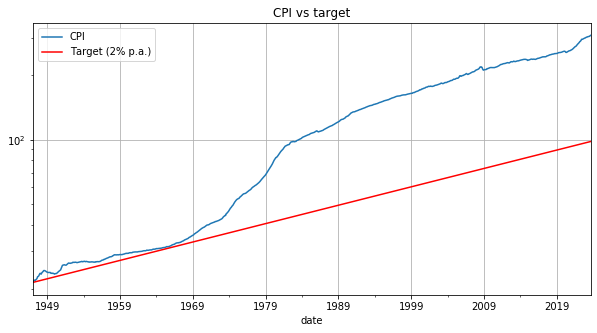

In [19]:
data_cpi['All items'].plot(logy=True, figsize=(10, 5), label='CPI', legend=True, title='CPI vs target')
target = data_cpi['All items'].copy().dropna()
target.iloc[:] = target.iloc[0]*1.02**((target.index-target.index[0]).days/365.25)
target.plot(ax=plt.gca(), color='r', label='Target (2% p.a.)', legend=True)
plt.gca().grid()
save_fig(plt.gcf(), 'cpi_vs_target')


In [20]:


# format the y-axis as a percentage


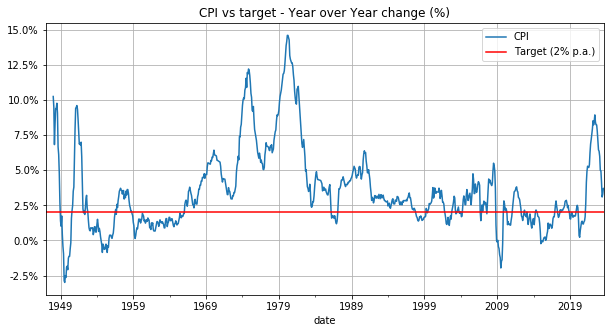

In [21]:
data_cpi['All items'].pct_change(12).plot(figsize=(10, 5), label='CPI', legend=True, title='CPI vs target - Year over Year change (%)')
target = data_cpi['All items'].copy().dropna()
target.iloc[:] = 0.02
target.plot(ax=plt.gca(), color='r', label='Target (2% p.a.)', legend=True)
plt.gca().grid()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
save_fig(plt.gcf(), 'cpi_vs_target_yoy')


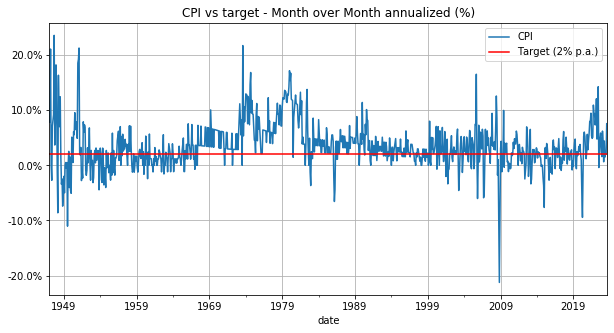

In [22]:
(12*data_cpi['All items'].pct_change(1)).plot(figsize=(10, 5), label='CPI', legend=True, title='CPI vs target - Month over Month annualized (%)')
target = data_cpi['All items'].copy().dropna()
target.iloc[:] = 0.02
target.plot(ax=plt.gca(), color='r', label='Target (2% p.a.)', legend=True)
plt.gca().grid()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
save_fig(plt.gcf(), 'cpi_vs_target_mom')


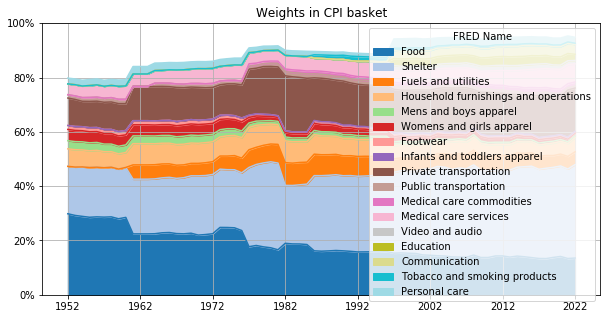

In [95]:

level_2 = data_indentation[data_indentation==2].index

data_cpi_w.loc[level_2].T.plot(kind='area', cmap='tab20', figsize=(10, 5), title='Weights in CPI basket')
plt.gca().grid()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
save_fig(plt.gcf(), 'weights')

# Implementation

In [406]:
t_split = pd.Timestamp('2014-12-31')

In [407]:
data_cpi, data_indentation, data_cpi_w, data_add_vars = load_data(database_filepath)

In [408]:
X, Y, cols = clean_data(data_cpi, data_indentation, data_cpi_w, data_add_vars, t_split=t_split)

In [409]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, t_split)

In [410]:
cols

{'components': Index(['Food', 'Shelter', 'Fuels and utilities',
        'Household furnishings and operations', 'Mens and boys apparel',
        'Womens and girls apparel', 'Footwear', 'Infants and toddlers apparel',
        'Private transportation', 'Public transportation',
        'Medical care commodities', 'Medical care services', 'Video and audio',
        'Education', 'Communication', 'Tobacco and smoking products',
        'Personal care'],
       dtype='object', name='FRED Name'),
 'weights': Index(['weight_Food', 'weight_Shelter', 'weight_Fuels and utilities',
        'weight_Household furnishings and operations',
        'weight_Mens and boys apparel', 'weight_Womens and girls apparel',
        'weight_Footwear', 'weight_Infants and toddlers apparel',
        'weight_Private transportation', 'weight_Public transportation',
        'weight_Medical care commodities', 'weight_Medical care services',
        'weight_Video and audio', 'weight_Education', 'weight_Communication',
  

In [411]:
def fit_and_eval(model, name='Naive model'):
    
    model.fit(X_train, Y_train)

    comp = evaluate_model(model, X_test, Y_test)
    avg = (comp['prediction']-comp['true']).mean()
    rmse = evaluate_rmse(model, X_test, Y_test)
    print(rmse)
    comp.plot(figsize=(10, 5), title=f'Test data prediction: {name}')
    plt.gca().grid()

    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.annotate('Average Error: {:.1f}%\nRMSE: {:.1f}%'.format(100*avg, 100*rmse), (pd.Timestamp('2016-12-31'), 0.045))
    filename = re.sub("([^a-z0-9])*", "", name.lower())
    print(filename)
    save_fig(plt.gcf(), filename)
    return avg, rmse

0.023682408520368466
naivemodel


(0.003258618073232119, 0.023682408520368466)

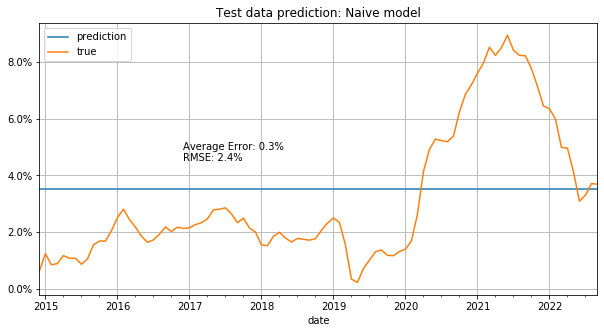

In [412]:
model = NaiveModel(cols)
fit_and_eval(model, 'Naive model')

0.023682408520368466
centralbanktarget2model


(-0.011888083657233194, 0.023682408520368466)

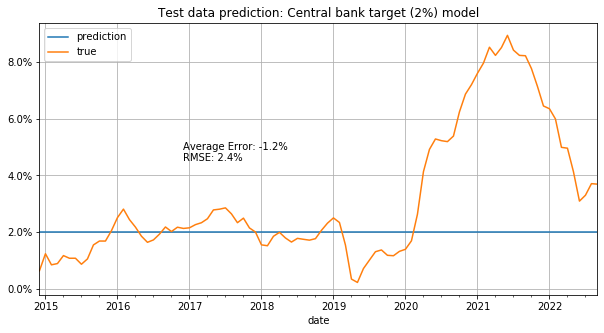

In [413]:
model = CBTarget(cols)
fit_and_eval(model, 'Central bank target (2%) model')

0.020701119520468
univariatetimeseriesmodelma6


(-0.002125486168446418, 0.020701119520468)

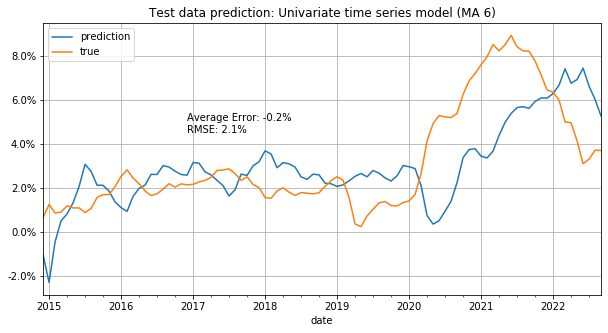

In [414]:
model = UnivarateTS(cols, [6])
fit_and_eval(model, 'Univariate time series model (MA 6)')

0.020451027898512674
univariatetimeseriesmodelma2and6


(-0.0018448012746488563, 0.020451027898512674)

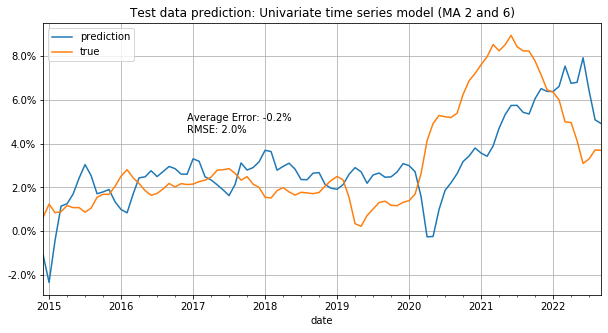

In [415]:
model = UnivarateTS(cols, [2, 6])
fit_and_eval(model, 'Univariate time series model (MA 2 and 6)')

0.021872994734441167
bottomupaggregationmodelma6forindividualvars


(-0.00043429376035325934, 0.021872994734441167)

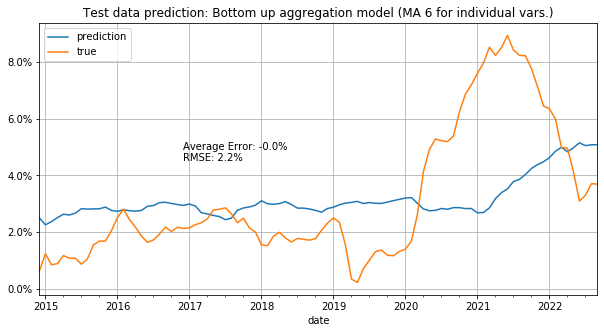

In [511]:
model = BottomUpAgg(cols, [6])
fit_and_eval(model, 'Bottom up aggregation model (MA 6 for individual vars.)')

In [417]:
r2 = pd.Series({k: model.mod[k].rsquared for k in model.mod.keys()}).to_frame('R2')
r2['avg. weight (2015-2023)']= model.pred_w.mean()
r2.sort_values('R2', inplace=True)
format_dict = {k: '{:.1%}' for k in r2.columns}
to_tex(r2.style.format(format_dict))



\begin{tabular}{lrr}
{} & {R2} & {avg. weight (2015-2023)} \\
Private transportation & 0.7\% & 15.9\% \\
Public transportation & 1.5\% & 1.1\% \\
Womens and girls apparel & 4.3\% & 1.2\% \\
Footwear & 9.3\% & 0.7\% \\
Fuels and utilities & 12.6\% & 4.9\% \\
Tobacco and smoking products & 14.0\% & 0.6\% \\
Infants and toddlers apparel & 15.8\% & 0.1\% \\
Mens and boys apparel & 18.6\% & 0.7\% \\
Food & 19.3\% & 14.4\% \\
Household furnishings and operations & 40.0\% & 4.7\% \\
Shelter & 48.3\% & 35.1\% \\
Education & 49.7\% & 3.1\% \\
Personal care & 51.8\% & 2.6\% \\
Medical care services & 53.6\% & 7.3\% \\
Medical care commodities & 54.4\% & 1.8\% \\
Video and audio & 56.3\% & 1.7\% \\
Communication & 60.8\% & 3.9\% \\
\end{tabular}



In [591]:
import re
from udacity_inflation_forecast.models.models import NaiveModel, CBTarget, UnivarateTS, BottomUpAgg, UnivarateTSEconomicVars
from udacity_inflation_forecast.models.train_classifier import evaluate_model, evaluate_rmse
from sklearn.model_selection import GridSearchCV


0.013368453588959743
ma6modelwithaddeconomicvariables


(0.010451755720915236, 0.013368453588959743)

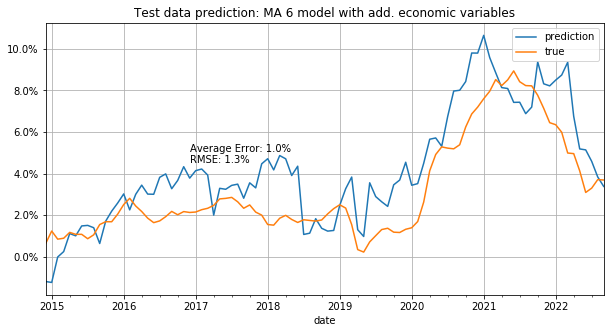

In [592]:
model = UnivarateTSEconomicVars(cols, [6], clip=0.2)
fit_and_eval(model, 'MA 6 model with add. economic variables')

# Refinement

In [528]:
li = []
for i1 in range(1, 18):
    li.append([i1])
    for i2 in range(1, 18):
        if i2 < i1:
            li.append([i1, i2])
            for i3 in range(1, 18):
                if i3 < i2:
                    li.append([i1, i2, i3])
          

In [529]:
parameters = {
    'ma_to_use': li,
    'columns': [cols]
    }

In [530]:
model = UnivarateTS()

In [531]:
cv = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error')

C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for m

0.02035834474029088
ma17modelfoundusingcrossvalidation


C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


(-0.002227430171455556, 0.02035834474029088)

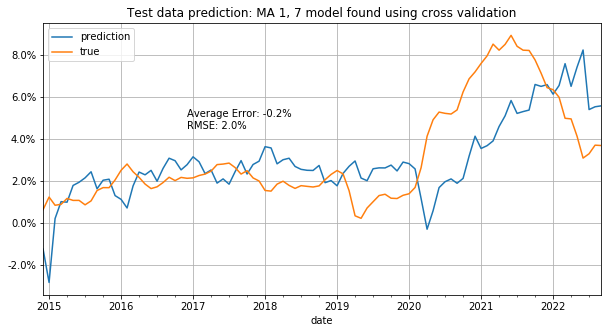

In [532]:
fit_and_eval(cv, 'MA 1, 7 model found using cross validation')

In [509]:
cv.best_params_

{'columns': {'components': Index(['Food', 'Shelter', 'Fuels and utilities',
         'Household furnishings and operations', 'Mens and boys apparel',
         'Womens and girls apparel', 'Footwear', 'Infants and toddlers apparel',
         'Private transportation', 'Public transportation',
         'Medical care commodities', 'Medical care services', 'Video and audio',
         'Education', 'Communication', 'Tobacco and smoking products',
         'Personal care'],
        dtype='object', name='FRED Name'),
  'weights': Index(['weight_Food', 'weight_Shelter', 'weight_Fuels and utilities',
         'weight_Household furnishings and operations',
         'weight_Mens and boys apparel', 'weight_Womens and girls apparel',
         'weight_Footwear', 'weight_Infants and toddlers apparel',
         'weight_Private transportation', 'weight_Public transportation',
         'weight_Medical care commodities', 'weight_Medical care services',
         'weight_Video and audio', 'weight_Education', 

# Refinement bottom up models

In [543]:
def powerset(s):
    x = len(s)
    li = list()
    for i in range(1 << x):
        li.append([s[j] for j in range(x) if (i & (1 << j))])
    return li[1:]

In [570]:
model = BottomUpAgg(None, None, cols)


In [556]:
parameters = {
    'ma_to_use': [[1, 7]],
    'columns': [cols],
    'components': list(filter(lambda x: len(x)<5, powerset(cols['components'])))
    }

cv = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error')

C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.boo

0.023985342624548305
bottomupaggregationmodelfoundusingcrossvalidation


C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


(0.00048679394524844393, 0.023985342624548305)

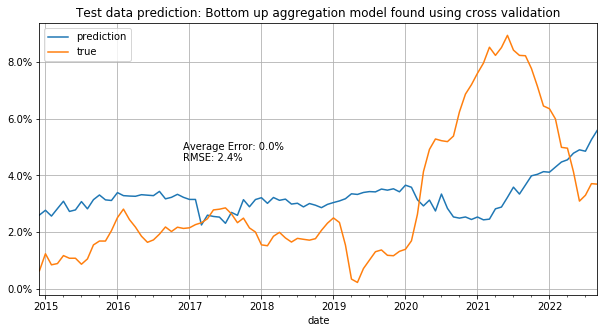

In [558]:
fit_and_eval(cv, 'Bottom up aggregation model found using cross validation')

In [560]:
cv.best_params_

{'columns': {'components': Index(['Food', 'Shelter', 'Fuels and utilities',
         'Household furnishings and operations', 'Mens and boys apparel',
         'Womens and girls apparel', 'Footwear', 'Infants and toddlers apparel',
         'Private transportation', 'Public transportation',
         'Medical care commodities', 'Medical care services', 'Video and audio',
         'Education', 'Communication', 'Tobacco and smoking products',
         'Personal care'],
        dtype='object', name='FRED Name'),
  'weights': Index(['weight_Food', 'weight_Shelter', 'weight_Fuels and utilities',
         'weight_Household furnishings and operations',
         'weight_Mens and boys apparel', 'weight_Womens and girls apparel',
         'weight_Footwear', 'weight_Infants and toddlers apparel',
         'weight_Private transportation', 'weight_Public transportation',
         'weight_Medical care commodities', 'weight_Medical care services',
         'weight_Video and audio', 'weight_Education', 

In [563]:
parameters = {
    'ma_to_use': [[1, 7]],
    'columns': [cols],
    'components': list(filter(lambda x: len(x)>14, powerset(cols['components'])))
    }

cv = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error')

C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.boo

0.02279516841145937
bottomupaggregationmodelfoundusingcrossvalidationdroppingvars


(-0.0012316361005535448, 0.02279516841145937)

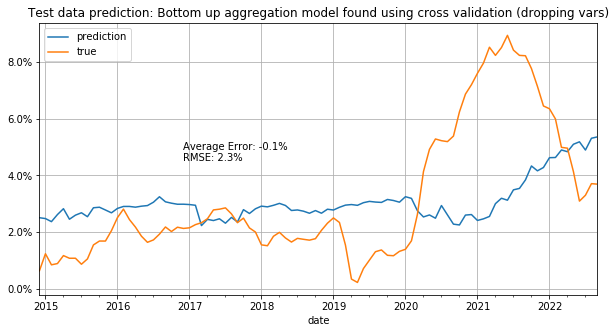

In [564]:
fit_and_eval(cv, 'Bottom up aggregation model found using cross validation (dropping vars)')

# Refinment Economic models

In [593]:
model = UnivarateTSEconomicVars(cols, [6], clip=0.2)

parameters = {
    'ma_to_use': [[1, 7]],
    'columns': [cols],
    'vars_to_use': list(filter(lambda x: len(x)<5, powerset(cols['other_vars']))),
    'clip': [0.2]
    }

cv = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error')

C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.boo

0.013650387828718049
ma17modelenhancedwitheconomicvariablesfoundusingcrossvalidation


C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


(-0.017394910139671413, 0.013650387828718049)

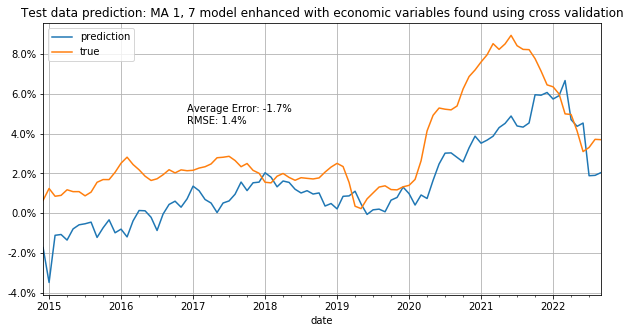

In [595]:
fit_and_eval(cv, 'MA 1, 7 model enhanced with economic variables found using cross validation')

In [596]:
cv.best_params_

{'clip': 0.2,
 'columns': {'components': Index(['Food', 'Shelter', 'Fuels and utilities',
         'Household furnishings and operations', 'Mens and boys apparel',
         'Womens and girls apparel', 'Footwear', 'Infants and toddlers apparel',
         'Private transportation', 'Public transportation',
         'Medical care commodities', 'Medical care services', 'Video and audio',
         'Education', 'Communication', 'Tobacco and smoking products',
         'Personal care'],
        dtype='object', name='FRED Name'),
  'weights': Index(['weight_Food', 'weight_Shelter', 'weight_Fuels and utilities',
         'weight_Household furnishings and operations',
         'weight_Mens and boys apparel', 'weight_Womens and girls apparel',
         'weight_Footwear', 'weight_Infants and toddlers apparel',
         'weight_Private transportation', 'weight_Public transportation',
         'weight_Medical care commodities', 'weight_Medical care services',
         'weight_Video and audio', 'weigh

In [597]:
model = UnivarateTSEconomicVars(cols, [6], clip=0.2)

parameters = {
    'ma_to_use': [[1, 7]],
    'columns': [cols],
    'vars_to_use': list(filter(lambda x: len(x)<8, powerset(cols['other_vars']))),
    'clip': [0.2]
    }

cv = GridSearchCV(model, param_grid=parameters, scoring='neg_mean_squared_error')

In [ ]:
fit_and_eval(cv, 'MA 1, 7 model enhanced with economic variables found using cross vali.')

C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\AJL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.boo

In [ ]:
cv.best_params_

In [ ]:
neg_mean_squared_error

In [ ]:
GridSearchCV

In [171]:
X = X_train

In [172]:
X_train

,weight_Food,weight_Shelter,weight_Fuels and utilities,weight_Household furnishings and operations,weight_Mens and boys apparel,weight_Womens and girls apparel,weight_Footwear,weight_Infants and toddlers apparel,weight_Private transportation,weight_Public transportation,...,M1_Index_M_SA,M2_Index_M_SA,Real_M2_Index_M_SA,M3_Index_M_SA,WTI_Index_M_NSA,Real_Borad_Effective_Exchange_Index_M_NSA,Unemployment_Rate_Pct_M_SA,FFER_Pct_D_NSA,10Y_Pct_D_NSA,1M_R_Pct_M_NSA
date,,,,,,,,,,,,,,,,,,,,,
1948-01-31,0.373982,0.218824,0.000000,0.080837,0.037599,0.052137,0.018047,0.000000,0.126708,0.015290,...,0.004587,0.005548,0.002415,0.005588,0.241546,0.000032,3.4,5.175661,6.047341,1.667886
1948-02-29,0.373982,0.218824,0.000000,0.080837,0.037599,0.052137,0.018047,0.000000,0.126708,0.015290,...,0.004587,0.005548,0.002415,0.005588,0.000000,0.000032,3.8,5.175661,6.047341,1.667886
1948-03-31,0.373982,0.218824,0.000000,0.080837,0.037599,0.052137,0.018047,0.000000,0.126708,0.015290,...,0.004587,0.005548,0.002415,0.005588,0.000000,0.000032,4.0,5.175661,6.047341,1.667886
1948-04-30,0.373982,0.218824,0.000000,0.080837,0.037599,0.052137,0.018047,0.000000,0.126708,0.015290,...,0.004587,0.005548,0.002415,0.005588,0.000000,0.000032,3.9,5.175661,6.047341,1.667886
1948-05-31,0.373982,0.218824,0.000000,0.080837,0.037599,0.052137,0.018047,0.000000,0.126708,0.015290,...,0.004587,0.005548,0.002415,0.005588,0.000000,0.000032,3.5,5.175661,6.047341,1.667886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-31,0.150278,0.344795,0.055581,0.044155,0.008791,0.015168,0.007642,0.001423,0.149329,0.011827,...,-0.014078,0.002537,0.002701,0.002537,-0.068057,0.005653,6.1,0.070000,2.420000,-1.696280
2014-09-30,0.150278,0.344795,0.055581,0.044155,0.008791,0.015168,0.007642,0.001423,0.149329,0.011827,...,0.023131,0.003569,0.003502,0.003569,-0.034493,0.012199,5.9,0.070000,2.530000,-2.775060
2014-10-31,0.150278,0.344795,0.055581,0.044155,0.008791,0.015168,0.007642,0.001423,0.149329,0.011827,...,0.003733,0.005757,0.005947,0.005757,-0.094518,0.009098,5.7,0.070000,2.300000,-1.153638


In [173]:
ma_to_use = 6

In [177]:
X_df = X_train[cols['all_items']].rolling(ma_to_use, min_periods=1).mean().to_frame()
X_df['constant'] = 1

In [182]:
Y_train

date
1948-01-31    0.013936
1948-02-29    0.010139
1948-03-31    0.017447
1948-04-30    0.004198
1948-05-31   -0.004165
                ...   
2014-08-31    0.002413
2014-09-30    0.000088
2014-10-31    0.001276
2014-11-30    0.004363
2014-12-31    0.006387
Name: All items, Length: 804, dtype: float64

In [187]:
mod = OLS(Y_train, X_df).fit()

In [176]:
X_df

date
1948-01-31    0.011534
1948-02-29    0.005556
1948-03-31    0.001310
1948-04-30    0.004387
1948-05-31    0.005105
                ...   
2014-08-31    0.001349
2014-09-30    0.001021
2014-10-31    0.000677
2014-11-30    0.000046
2014-12-31   -0.000688
Freq: M, Name: All items, Length: 804, dtype: float64

In [83]:
rmse

0.023682408520368466

In [70]:
model.predict(X_test)

NameError: name 'pd' is not defined

In [153]:
data_add_vars

,CPI_Urban_ex_Food_Energy_Index_M_SA,CPI_Urban_All_Index_M_SA,Consumer_Inflation_Expectations_UNIM_12M_Pct_M_NSA,Market_Inflation_Expectations_ClevelandFED_10YR_Pct_M_NSA,Market_Inflation_Expectations_ClevelandFED_1YR_Pct_M_NSA,Sticky_Price_CPI_ex_Food_Energy_Shelder_Pct_M_SA,Sticky_Price_CPI_Pct_M_SA,BE_10YR_Pct_D_NSA,BE_5YR_Pct_D_NSA,Consumer_Loans_Index_M_SA,...,M1_Index_M_SA,M2_Index_M_SA,Real_M2_Index_M_SA,M3_Index_M_SA,WTI_Index_M_NSA,Real_Borad_Effective_Exchange_Index_M_NSA,Unemployment_Rate_Pct_M_SA,FFER_Pct_D_NSA,10Y_Pct_D_NSA,1M_R_Pct_M_NSA
date,,,,,,,,,,,,,,,,,,,,,
1946-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.17,NaN,NaN,NaN,NaN,NaN
1946-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.17,NaN,NaN,NaN,NaN,NaN
1946-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.17,NaN,NaN,NaN,NaN,NaN
1946-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN,NaN
1946-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.27,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30,308.309,303.841,3.3,1.754897,1.366263,0.009772,0.241034,2.22,2.18,1890.1707,...,18490.1,20854.4,6863.6,2.089040e+13,70.25,107.22,3.6,5.08,3.75,6.004632
2023-07-31,308.801,304.348,3.4,2.064013,2.474317,0.054335,0.256887,2.37,2.27,1885.3117,...,18428.0,20863.7,6855.2,2.090530e+13,76.07,106.21,3.5,5.33,3.90,2.854389
2023-08-31,309.661,306.269,3.5,2.138766,2.606969,0.385655,0.385828,2.24,2.15,1894.6261,...,18303.4,20825.3,6799.7,2.086530e+13,81.39,107.67,3.8,5.33,4.17,3.100313


In [137]:
X_cpi_components

,Food,Shelter,Fuels and utilities,Household furnishings and operations,Mens and boys apparel,Womens and girls apparel,Footwear,Infants and toddlers apparel,Private transportation,Public transportation,Medical care commodities,Medical care services,Video and audio,Education,Communication,Tobacco and smoking products,Personal care
date,,,,,,,,,,,,,,,,,
1947-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-28,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518
1947-03-31,1.303030,1.696709,1.696709,1.696709,-0.007317,0.648216,1.307116,1.696709,inf,1.696709,1.696709,1.696709,1.696709,1.696709,1.696709,1.696709,1.696709
1947-04-30,-1.415966,-1.000000,-1.000000,-1.000000,-0.338176,-0.705435,-0.860792,-1.000000,-0.009852,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1947-05-31,-0.662411,-inf,-inf,-inf,-1.000000,-0.668468,-0.003636,-inf,-0.504878,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,7.344126,0.318080,-0.053355,-3.865204,-0.423895,5.052284,-0.882598,-7.162007,-1.161679,-1.186296,0.409718,-0.613906,-1.142870,-0.619015,2.015686,4.285677,-0.536257
2023-06-30,-0.475717,-0.342719,-1.276092,-0.815862,1.770276,-0.993888,0.832499,-2.501931,-3.082627,-8.319753,-0.713349,-0.544924,0.155603,0.154618,0.440273,-0.854451,-0.652291
2023-07-31,1.237388,0.205852,-0.480981,-0.476652,-0.965262,33.998413,-10.851281,0.892966,-0.620499,-0.068647,1.737912,15.628064,-2.170771,2.087748,-0.727071,4.857953,-0.928699


In [130]:
X_cpi_components

,Food,Shelter,Fuels and utilities,Household furnishings and operations,Mens and boys apparel,Womens and girls apparel,Footwear,Infants and toddlers apparel,Private transportation,Public transportation,Medical care commodities,Medical care services,Video and audio,Education,Communication,Tobacco and smoking products,Personal care
date,,,,,,,,,,,,,,,,,
1947-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-28,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518,0.006518
1947-03-31,1.303030,1.696709,1.696709,1.696709,-0.007317,0.648216,1.307116,1.696709,inf,1.696709,1.696709,1.696709,1.696709,1.696709,1.696709,1.696709,1.696709
1947-04-30,-1.415966,-1.000000,-1.000000,-1.000000,-0.338176,-0.705435,-0.860792,-1.000000,-0.009852,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1947-05-31,-0.662411,-inf,-inf,-inf,-1.000000,-0.668468,-0.003636,-inf,-0.504878,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,7.344126,0.318080,-0.053355,-3.865204,-0.423895,5.052284,-0.882598,-7.162007,-1.161679,-1.186296,0.409718,-0.613906,-1.142870,-0.619015,2.015686,4.285677,-0.536257
2023-06-30,-0.475717,-0.342719,-1.276092,-0.815862,1.770276,-0.993888,0.832499,-2.501931,-3.082627,-8.319753,-0.713349,-0.544924,0.155603,0.154618,0.440273,-0.854451,-0.652291
2023-07-31,1.237388,0.205852,-0.480981,-0.476652,-0.965262,33.998413,-10.851281,0.892966,-0.620499,-0.068647,1.737912,15.628064,-2.170771,2.087748,-0.727071,4.857953,-0.928699


In [111]:
data_cpi.pct_change()

,All items,Food and beverages,Food,Food at home,Cereals and bakery products,"Meats, poultry, fish, and eggs",Dairy and related products,Fruits and vegetables,Nonalcoholic beverages and beverage materials,Coffee,...,"Tuition, other school fees, and childcare",Communication,Information and information processing,"Information technology, hardware and services",Personal computers and peripheral equipment,Other goods and services,Tobacco and smoking products,Personal care,Miscellaneous personal services,Laundry and dry cleaning services
date,,,,,,,,,,,,,,,,,,,,,
1947-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-28,0.006518,NaN,0.013158,NaN,NaN,NaN,NaN,0.014423,0.027027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-31,0.017576,NaN,0.030303,NaN,NaN,NaN,NaN,0.052133,0.026316,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-30,0.000000,NaN,-0.012605,NaN,NaN,NaN,NaN,-0.018018,0.025641,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-05-31,-0.002273,NaN,-0.004255,NaN,NaN,NaN,NaN,0.018349,0.008333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,0.001241,0.002206,0.002028,0.000534,-0.000082,-0.011975,-0.011194,0.013117,0.007467,0.000812,...,0.000693,-0.003186,-0.003284,-0.001403,-0.004272,0.005269,0.005774,0.005154,0.006926,0.010298
2023-06-30,0.001804,0.001008,0.001063,-0.000490,0.000633,-0.004216,-0.003023,0.007504,-0.000636,-0.006464,...,0.001686,-0.004588,-0.004745,0.002107,0.001824,0.001618,0.000840,0.001792,0.001354,-0.003977
2023-07-31,0.001669,0.002309,0.002378,0.002738,0.000178,0.004836,0.004627,0.004371,0.000235,0.010455,...,0.003461,-0.001252,-0.001075,-0.003224,-0.014375,0.001005,0.004923,0.000128,-0.005256,0.001570


In [ ]:
X = pd.concat([data_cpi[]])

In [49]:
data_cpi

FRED Name,All items,Food and beverages,Food,Housing,Shelter,Fuels and utilities,Household furnishings and operations,Apparel,Mens and boys apparel,Womens and girls apparel,...,Medical care commodities,Medical care services,Recreation,Video and audio,Education and communication,Education,Communication,Other goods and services,Tobacco and smoking products,Personal care
date,,,,,,,,,,,,,,,,,,,,,
1947-01-31,21.480,NaN,22.800,NaN,NaN,NaN,NaN,38.400,40.700,53.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-02-28,21.620,NaN,23.100,NaN,NaN,NaN,NaN,38.800,41.000,54.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-03-31,22.000,NaN,23.800,NaN,NaN,NaN,NaN,39.400,41.300,55.200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-04-30,22.000,NaN,23.500,NaN,NaN,NaN,NaN,39.700,41.500,55.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-05-31,21.950,NaN,23.400,NaN,NaN,NaN,NaN,39.800,41.500,55.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31,303.294,319.316,321.729,318.193,378.622,299.125,148.466,131.195,126.881,110.288,...,403.358,593.543,136.111,116.223,145.443,290.068,75.413,536.518,1423.094,273.439
2023-06-30,303.841,319.638,322.071,319.154,380.006,300.024,148.290,131.608,127.909,110.293,...,404.109,593.402,136.264,116.111,145.096,290.365,75.067,537.386,1424.290,273.929
2023-07-31,304.348,320.376,322.837,320.281,381.681,300.492,148.198,131.567,127.945,110.468,...,406.169,591.058,136.430,116.242,145.166,291.283,74.973,537.926,1431.302,273.964


In [46]:
data_indentation

FRED Name
All items                               0
Food and beverages                      1
Food                                    2
Housing                                 1
Shelter                                 2
Fuels and utilities                     2
Household furnishings and operations    2
Apparel                                 1
Mens and boys apparel                   2
Womens and girls apparel                2
Footwear                                2
Infants and toddlers apparel            2
Transportation                          1
Private transportation                  2
Public transportation                   2
Medical care                            1
Medical care commodities                2
Medical care services                   2
Recreation                              1
Video and audio                         2
Education and communication             1
Education                               2
Communication                           2
Other goods and services